In [2]:
import pandas as pd
from numpy.random import randint, seed
import matplotlib.pyplot as plt

# Mean

## 1. The Mean

In [3]:
distribution = [0,2,3,3,3,4,13]
mean = sum(distribution) / len(distribution)
mean

4.0

In [4]:
above = []
below = []

for value in distribution:
    if value < mean:
        below.append(mean - value)
    if value > mean:
        above.append(value - mean)
        
equal_distances = (sum(above) == sum(below))
equal_distances

True

## 2. The Mean as a Balance Point

In [5]:
equal_distances = 0

for i in range(5000):
    seed(i)
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    
    for value in distribution:
        if value == mean:
            continue
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
        
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1
        
equal_distances

5000

## 3. An Alternative Definition

In [6]:
distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]

def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
    
    return sum_distribution / len(distribution)

mean_1 = mean(distribution_1)
mean_2 = mean(distribution_2)
mean_3 = mean(distribution_3) 

In [7]:
houses = pd.read_csv('miami-housing.csv')

In [8]:
houses.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [9]:
houses['SALE_PRC'] = houses['SALE_PRC'].astype(int)

In [10]:
houses.rename(columns={'SALE_PRC':'SalePrice'},inplace=True)

In [11]:
for i in range(2930,13932):
    houses.drop(index=[i],inplace=True)

In [12]:
houses.shape

(2930, 17)

## 4. Mean House Prices

In [13]:
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)

function_mean = mean(houses['SalePrice'])
pandas_mean = houses['SalePrice'].mean()
means_are_equal = (function_mean == pandas_mean)
means_are_equal

True

## 5. Estimating the Population Mean

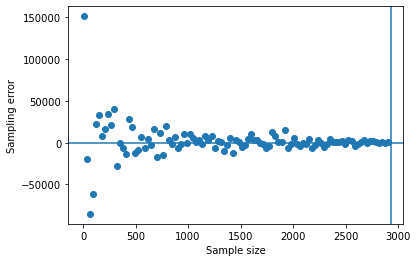

In [14]:
parameter = houses['SalePrice'].mean()
sample_size = 5

sample_sizes = []
sampling_errors = []

for i in range(101):
    sample = houses['SalePrice'].sample(sample_size , random_state = i)
    statistic = sample.mean()
    sampling_error = parameter - statistic
    sampling_errors.append(sampling_error)
    sample_sizes.append(sample_size)
    sample_size += 29
    
plt.scatter(sample_sizes, sampling_errors)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')
plt.show()

## 6. Estimates from Low-Sized Samples

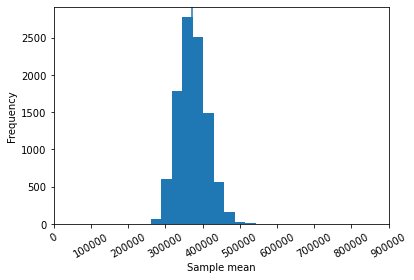

In [15]:
means = []
for i in range(10000):
    sample = houses['SalePrice'].sample(100,random_state=i)
    mean = sample.mean()
    means.append(mean)

    
plt.hist(means)
plt.axvline(houses['SalePrice'].mean())
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,900000)
plt.xticks(rotation=30)
plt.show()

## 7. The Sample Mean as an Unbiased Estimator

In [16]:
population = [3, 7, 2]
samples = [[3, 7], [3, 2],
           [7, 2], [7, 3],
           [2, 3], [2, 7]
          ]

sample_means = []
for sample in samples:
    sample_means.append(sum(sample) / len(sample))
    
population_mean = sum(population) / len(population)
mean_of_sample_means = sum(sample_means) / len(sample_means)

unbiased = (population_mean == mean_of_sample_means)
unbiased

True

# Median

In [17]:
sold_count = houses.groupby('month_sold',as_index=False)['SalePrice'].count()
sold_count.rename(columns={'SalePrice':'Houses Sold'},inplace=True)

In [18]:
sold_count

,month_sold,Houses Sold
0,1,202
1,2,213
2,3,249
3,4,243
4,5,254
5,6,269
6,7,271
7,8,254
8,9,267
9,10,211


In [19]:
houses_per_month = houses.groupby('month_sold',as_index=False)['SalePrice'].mean()

In [20]:
houses_per_month

,month_sold,SalePrice
0,1,362756.435644
1,2,371668.896714
2,3,363634.269076
3,4,356989.711934
4,5,406620.866142
5,6,394571.003717
6,7,360011.070111
7,8,353819.027559
8,9,348546.816479
9,10,362223.696682


In [21]:
houses_per_month['Houses Sold'] = sold_count['Houses Sold']

In [22]:
houses_per_month.rename(columns={'SalePrice':'Mean Price'},inplace=True)

In [23]:
houses_per_month

,month_sold,Mean Price,Houses Sold
0,1,362756.435644,202
1,2,371668.896714,213
2,3,363634.269076,249
3,4,356989.711934,243
4,5,406620.866142,254
5,6,394571.003717,269
6,7,360011.070111,271
7,8,353819.027559,254
8,9,348546.816479,267
9,10,362223.696682,211


## 1. Difference Means

In [24]:
mean_new = houses_per_month['Mean Price'].mean()

mean_original = houses['SalePrice'].mean()

difference = mean_original - mean_new
difference

192.93615723995026

## 2. Different Weights

In [25]:
houses_per_month['sum_per_month'] = houses_per_month['Mean Price'] * houses_per_month['Houses Sold']
all_sums_together = houses_per_month['sum_per_month'].sum()
total_n_houses = houses_per_month['Houses Sold'].sum()
weighted_mean = all_sums_together / total_n_houses

mean_original = houses['SalePrice'].mean()

difference = round(mean_original, 10) - round(weighted_mean, 10)
difference

0.0

## 3. The Weighted Mean

In [26]:
def weighted_mean(distribution, weights):
    weighted_sum = []
    for mean, weight in zip(distribution, weights):
        weighted_sum.append(mean * weight)
    
    return sum(weighted_sum) / sum(weights)

weighted_mean_function = weighted_mean(houses_per_month['Mean Price'], houses_per_month['Houses Sold'])

from numpy import average
weighted_mean_numpy = average(houses_per_month['Mean Price'],weights = houses_per_month['Houses Sold'])

equal = round(weighted_mean_function, 10) == round(weighted_mean_numpy, 10)
equal

True

## 4. The Median for Open-ended Distributions

In [27]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']

median1 = 23
median2 = 55
median3 = 32

In [28]:
houses2 = pd.read_csv('AmesHousing.csv')
houses2.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 5. Distributions with Even Number of Values

In [29]:
# Sorting the values
rooms = houses2['TotRms AbvGrd'].copy()
rooms = rooms.replace({'10 or more': 10})
rooms = rooms.astype(int)
rooms_sorted = rooms.sort_values()

# Finding the median
middle_indices = [int((len(rooms_sorted) / 2) - 1),
                  int((len(rooms_sorted) / 2))
                 ] # len - 1 and len because Series use 0-indexing 
middle_values = rooms_sorted.iloc[middle_indices]
median = middle_values.mean()

In [30]:
middle_values

957    6
953    6
Name: TotRms AbvGrd, dtype: int32

In [31]:
median

6.0

## 6. The Median as a Resistant Statistic

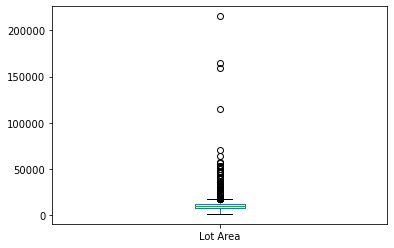

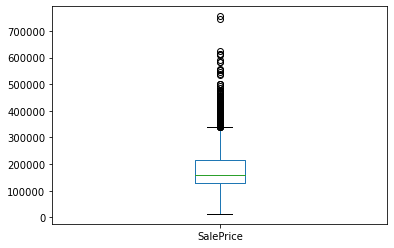

In [32]:
houses2['Lot Area'].plot.box()
plt.show()
houses2['SalePrice'].plot.box()
plt.show()


lotarea_difference = houses2['Lot Area'].mean() - houses2['Lot Area'].median()

saleprice_difference = houses2['SalePrice'].mean() - houses2['SalePrice'].median()

In [33]:
lotarea_difference

711.4218430034125

In [34]:
saleprice_difference

20796.060068259394

## 7. The Median for Ordinal Scales

In [35]:
median = houses2['Overall Cond'].median()
median

5.0

In [36]:
mean = houses2['Overall Cond'].mean()
mean

5.563139931740614

<AxesSubplot:ylabel='Frequency'>

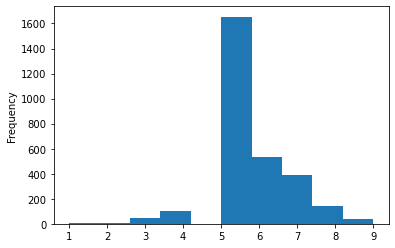

In [37]:
houses2['Overall Cond'].plot.hist()

In [38]:
# more_representative = 'mean'

# The Mode

## 1. The Mode for Ordinal Variables

In [39]:
# ordinal
def mode(array):

    counts = {}

    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
        
    return max(counts, key = counts.get)

mode_function = mode(houses2['Land Slope'])
mode_method = houses2['Land Slope'].mode()

same = mode_function == mode_method
same

0    True
dtype: bool

## 2. The Mode for Nominal Variables

In [40]:
#nominal
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    return (max(counts, key = counts.get),counts)

mode,value_counts = mode(houses2['Roof Style'])

print(mode)

Gable


## 3. The Mode for Discrete Variables

In [41]:
bedroom_variable = 'discrete'

bedroom_mode = houses2['Bedroom AbvGr'].mode()
price_variable = 'continuous'
bedroom_mode

0    3
dtype: int64

## 4. Special Cases

In [42]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses2['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)

mode = 150000

mean = houses2['SalePrice'].mean()
median = houses2['SalePrice'].median()

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


In [43]:
mean

180796.0600682594

In [44]:
median

160000.0

## 5. Skewed Distributions

In [45]:
distribution_1 = {'mean': 3021 , 'median': 3001, 'mode': 2947}
distribution_2 = {'median': 924 , 'mode': 832, 'mean': 962}
distribution_3 = {'mode': 202, 'mean': 143, 'median': 199}

shape_1 = 'right skew'
shape_2 = 'right skew'
shape_3 = 'left skew'

## 6. Symmetrical Distributions

In [46]:
houses2['Mo Sold'].mode()

0    6
dtype: int64

In [47]:
houses2['Mo Sold'].mean()

6.216040955631399

In [48]:
houses2['Mo Sold'].median()

6.0

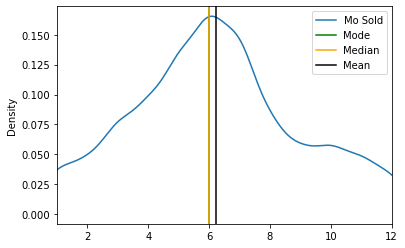

In [49]:
houses2['Mo Sold'].plot.kde(xlim=[1,12])
plt.axvline(houses2['Mo Sold'].mode()[0], color = 'Green', label = 'Mode')
plt.axvline(houses2['Mo Sold'].median(),color='Orange', label = 'Median')
plt.axvline(houses2['Mo Sold'].mean(),color='Black',label='Mean')
plt.legend()
plt.show()